# Gridding The Marine Magnetic Data - Equivalent Source Method

## Importing the data

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
data_dir = 'marco-mag/data/Magnetometry/merged_data'

In [3]:
import os
os.listdir(data_dir)

['can_mag_es_corr.prj',
 'can_mag_raw_points.cpg',
 'can_mag_raw_points.shp',
 'can_mag_raw_points.prj',
 'can_mag_es_corr.csv',
 'can_mag_raw.csv',
 'can_mag_corr.csv',
 'can_mag_raw_points.shx',
 'can_mag_es_corr.dbf',
 'can_mag_es_corr.shx',
 'can_mag_raw_points.dbf',
 'can_mag_es_corr.shp',
 'can_mag_es_corr.cpg']

In [4]:
import pandas as pd

df_corr = pd.read_csv(f'{data_dir}/can_mag_corr.csv', sep=',')
df_corr

/tmp/ipykernel_26395/774876993.py:3: DtypeWarning: Columns (25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_corr = pd.read_csv(f'{data_dir}/can_mag_corr.csv', sep=',')


,Reading_Date,Reading_Time,Magnetic_Field,Signal_Quality,Depth,Leak,Measurement_Time,Signal_Strength,Gradient_Condition,Weak_Signal,...,IGRF_F,IGRF_Dec,IGRF_Inc,IGRF_bx,IGRF_by,IGRF_bz,IGRF_nn_dist_deg,diurnal_proj_nT,Magnetic_Field_poly_corr,AMF
0,20-Aug-2025,17:36:36.700,22759.127,79,0.0,0,215,119,NaN,NaN,...,22618.5,-20.97884,-40.78664,0.706958,-0.271075,-0.653245,0.039767,-18.866356,22777.993356,159.493356
1,20-Aug-2025,17:36:37.200,22757.742,79,0.0,0,215,122,NaN,NaN,...,22618.5,-20.97884,-40.78664,0.706958,-0.271075,-0.653245,0.039767,-18.867653,22776.609653,158.109653
2,20-Aug-2025,17:36:37.700,22756.970,89,0.0,0,215,129,NaN,NaN,...,22618.5,-20.97884,-40.78664,0.706958,-0.271075,-0.653245,0.039769,-18.868951,22775.838951,157.338951
3,20-Aug-2025,17:36:38.700,22753.489,89,0.0,0,215,133,NaN,NaN,...,22618.5,-20.97884,-40.78664,0.706958,-0.271075,-0.653245,0.039771,-18.871546,22771.816836,153.316836
4,20-Aug-2025,17:36:39.200,22750.916,89,0.0,0,215,134,NaN,NaN,...,22618.5,-20.97884,-40.78664,0.706958,-0.271075,-0.653245,0.039772,-18.872844,22769.888898,151.388898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79341,21-Aug-2025,18:00:45.200,22585.829,89,0.0,0,215,129,NaN,NaN,...,22630.2,-21.04502,-40.78059,0.706711,-0.271916,-0.653163,0.036349,-21.975405,22607.804405,-22.395595
79342,21-Aug-2025,18:00:45.700,22585.503,89,0.0,0,215,133,NaN,NaN,...,22630.2,-21.04502,-40.78059,0.706711,-0.271916,-0.653163,0.036350,-21.981188,22607.484188,-22.715812
79343,21-Aug-2025,18:00:46.200,22585.352,89,0.0,0,215,133,NaN,NaN,...,22630.2,-21.04502,-40.78059,0.706711,-0.271916,-0.653163,0.036352,-21.986971,22607.338971,-22.861029
79344,21-Aug-2025,18:00:46.700,22584.775,89,0.0,0,215,133,NaN,NaN,...,22630.2,-21.04502,-40.78059,0.706711,-0.271916,-0.653163,0.036353,-21.992755,22606.767755,-23.432245


## Removing NaN values

In [5]:
df_corr.columns

Index(['Reading_Date', 'Reading_Time', 'Magnetic_Field', 'Signal_Quality',
       'Depth', 'Leak', 'Measurement_Time', 'Signal_Strength',
       'Gradient_Condition', 'Weak_Signal', 'Poor_Reading',
       'Instrument_Mistuned', 'Reading_ID', 'System_Time', 'Line_Name',
       'Mag_Latitude', 'Mag_Longitude', 'Mag_Easting', 'Mag_Northing',
       'Mag_Zone', 'GPS_Latitude', 'GPS_Longitude', 'GPS_Easting',
       'GPS_Northing', 'GPS_Zone', 'Marker', 'Marker_Time', 'timestamp_s',
       'source_file', '__survey_datetime_utc', 'DATE_vss', 'TIME_vss',
       'DOY_vss', 'VSSX_vss', 'VSSY_vss', 'VSSZ_vss', 'VSSF_vss',
       'Magnetic_Field_poly', 'Magnetic_Field__spike', '__dt_utc__',
       'IGRF_time', 'IGRF_X', 'IGRF_Y', 'IGRF_Z', 'IGRF_F', 'IGRF_Dec',
       'IGRF_Inc', 'IGRF_bx', 'IGRF_by', 'IGRF_bz', 'IGRF_nn_dist_deg',
       'diurnal_proj_nT', 'Magnetic_Field_poly_corr', 'AMF'],
      dtype='object')

In [6]:
df_corr.isna().sum()

Reading_Date                    0
Reading_Time                    0
Magnetic_Field                  0
Signal_Quality                  0
Depth                           0
Leak                            0
Measurement_Time                0
Signal_Strength                 0
Gradient_Condition          78303
Weak_Signal                 79346
Poor_Reading                78559
Instrument_Mistuned         79223
Reading_ID                      0
System_Time                     0
Line_Name                       0
Mag_Latitude                  920
Mag_Longitude                 920
Mag_Easting                   928
Mag_Northing                  928
Mag_Zone                    79346
GPS_Latitude                  920
GPS_Longitude                 920
GPS_Easting                   928
GPS_Northing                  928
GPS_Zone                    79346
Marker                      79331
Marker_Time                 79331
timestamp_s                     0
source_file                     0
__survey_datet

In [7]:
df_corr.dropna(subset=["AMF"], inplace=True)
df_corr.shape

(78385, 54)

In [8]:
df_corr.isna().sum()

Reading_Date                    0
Reading_Time                    0
Magnetic_Field                  0
Signal_Quality                  0
Depth                           0
Leak                            0
Measurement_Time                0
Signal_Strength                 0
Gradient_Condition          77346
Weak_Signal                 78385
Poor_Reading                77600
Instrument_Mistuned         78265
Reading_ID                      0
System_Time                     0
Line_Name                       0
Mag_Latitude                    0
Mag_Longitude                   0
Mag_Easting                     8
Mag_Northing                    8
Mag_Zone                    78385
GPS_Latitude                    0
GPS_Longitude                   0
GPS_Easting                     8
GPS_Northing                    8
GPS_Zone                    78385
Marker                      78370
Marker_Time                 78370
timestamp_s                     0
source_file                     0
__survey_datet

## Fitting the equivalent sources model

### ⚒️ `fit_eql_colab`: Colab-friendly Equivalent Sources fitting (Harmonica)

This helper prepares marine magnetic measurements in **Cartesian meters** (e.g., WGS84/UTM 23S) and fits an **Equivalent Sources (EQS)** model using Harmonica.  
It is designed for Google Colab: low memory, robust to messy CSVs, and fast via block averaging.

---

### 💡 Intuition: what are “equivalent sources”?

- We place a **sheet of fictitious point sources** at a constant depth $h$ beneath the survey. Their strengths are unknowns collected in $\mathbf{m}$.
- Each source produces a contribution at an observation point that **decays with distance** (via a Green’s function kernel). Adding up all sources gives a smooth field at the surface.
- By **superposition**, we can match the measured field on (or near) the observation level **without** needing the true geology. The sources are *equivalent*, not unique.
- **Deeper source sheet $\Rightarrow$ smoother field** at the surface (stronger upward continuation). **Shallower sheet $\Rightarrow$ more detail** (and greater risk of fitting noise).
- With **Tikhonov damping**, we penalize overly large/oscillatory source strengths, trading a tiny bit of misfit for stability and physical smoothness.

Visually: think of spreading a thin “charge/mass carpet” at depth $h$. Its collective field, when tuned, reproduces the measured signal above. Moving the carpet deeper blurs high-frequency wiggles; moving it shallower lets more detail through.

---

### 🧠 What the function does

1. **Coercion & dtype**: converts the required columns to numeric **`float32`** (saves memory).
2. **Vertical sign**: builds an **upward** coordinate $z$ (positive up). If you pass depth $D$ (positive down), it uses $z=-D$.
3. **QC**: drops rows with non-finite $(x,y,z)$ or data $d$; optionally drops duplicate $(x,y,z)$ samples.
4. **Fit EQS**: calls `hm.EquivalentSources(...)` **with block averaging** to reduce the number of sources/observations.
5. **Return**: the fitted EQS object (`eqs`) and the **cleaned** subset (`cleaned_df`) used in the inversion (it contains a `__upward__` column).

---

### 🧩 Forward model & objective

We approximate the observed scalar field $d(\mathbf{r})$ on the survey level by the field produced by a layer of equivalent point sources placed at depth $h$:

- **Forward model**:  
  $$\mathbf{d} = \mathbf{G}\,\mathbf{m},$$
  where $\mathbf{m}$ are source strengths and $\mathbf{G}$ is the Green’s matrix (geometry set by $(x,y,z)$ of data and sources; the kernel decays with distance).

- **Tikhonov regularized least squares** (Harmonica default):  
  $$\min_{\mathbf{m}}\; J(\mathbf{m}) = \|\mathbf{W}(\mathbf{d}-\mathbf{G}\mathbf{m})\|_2^2 \;+\; \lambda^2 \|\mathbf{m}\|_2^2,$$
  with optional data‐weight matrix $\mathbf{W}$ and **damping** $\lambda\ge 0$.

- **Normal equations**:  
  $$(\mathbf{G}^\top \mathbf{W}^\top\mathbf{W}\mathbf{G} + \lambda^2 \mathbf{I})\,\mathbf{m}
    \;=\; \mathbf{G}^\top \mathbf{W}^\top\mathbf{W}\,\mathbf{d}.$$

> **Key consequences:**  
> • Increasing $h$ mimics **upward continuation**, suppressing short wavelengths.  
> • Increasing $\lambda$ suppresses rough/large $\mathbf{m}$, stabilizing the solution.  
> • Block averaging reduces equation count and the number of sources by merging dense samples.

---

### 📥 Inputs (theoretical definitions)

- `df : DataFrame`  
  Table containing at least $(x,y)$ coordinates, a vertical coordinate, and the scalar data $d$ to invert.

- `easting_col, northing_col : str`  
  Column names for $x$ and $y$ in **meters** (already projected; do **not** pass degrees).

- `vertical_col : str`  
  Column with vertical coordinate. If it stores **depth** $D$ (positive downward), set `vertical_is_depth=True` so the function converts to **upward** $z=-D$.  
  Harmonica expects **$z$ positive upward**.

- `data_col : str`  
  Column with the scalar data $d$ to model (e.g., anomaly or corrected total field). If you want an anomaly map, pass the anomaly here.

- `vertical_is_depth : bool`  
  If `True`, the function computes $z=-D$; if `False`, it assumes the column already holds upward $z$.

- `depth : float`  
  **Source depth** $h$ (meters) below the observation level where the equivalent sources are placed.  
  Larger $h$ $\Rightarrow$ smoother field (stronger upward continuation); smaller $h$ $\Rightarrow$ more detail and potential overfit.

- `damping : float | None`  
  **Tikhonov parameter** $\lambda$. Controls the trade-off between data fit and model norm.  
  Small $\lambda$ (e.g., $10^{-4}$–$10^{-2}$) stabilizes the inversion; $\lambda=0$ removes regularization.

- `block_size : float`  
  **Block averaging size** (meters) used *inside Harmonica*. Data inside each $(x,y)$ block are averaged and a **single source** is placed per block (drastic memory/speed win).  
  Typical marine tracks: $25$–$100$ m.

- `dtype : {"float32","float64"}`  
  Internal floating precision. Use **`"float32"`** on Colab to halve memory and speed up.

- `drop_duplicate_coords : bool`  
  If `True`, exact duplicate $(x,y,z)$ rows are dropped (avoids singular systems and redundant equations).

---

### 📤 Outputs

- `eqs : hm.EquivalentSources`  
  Fitted model. Use:
  - **Prediction** on arbitrary points:  
    $$\hat{\mathbf{d}} = \mathbf{G}(\text{new coords})\\hat{\mathbf{m}} \quad \Rightarrow \quad \texttt{eqs.predict((x,y,z))}$$
  - **Gridding**: either `eqs.grid(...)` (version-dependent signature) or build grid coordinates and call `predict`, then wrap with `verde.make_xarray_grid`.

- `cleaned_df : DataFrame`  
  The subset actually used in the fit (after coercion/drops), with `__upward__` (meters, positive up).

---

### 🛠️ Preprocessing performed by the function

- **Coercion to numeric** and **cast to `float32`**: handles mixed-type CSVs and saves memory.
- **Upward coordinate build**: $z=-D$ if needed.
- **Finite filter**: drops rows where any of $x,y,z,d$ are not finite.
- **Duplicate removal**: optional drop of exact duplicate $(x,y,z)$.

---

### 📏 Practical guidance

- Start with: `depth = 200–500 m`, `damping = 1e-3`, `block_size = 50 m`, `dtype="float32"`.
- If the map is too noisy ➜ increase depth and/or damping.  
  If it’s too smooth ➜ decrease depth, possibly reduce damping.
- Dense lines ➜ increase `block_size` (e.g., 50–100 m).
- Always ensure inputs are **meters** and the vertical is **upward** for Harmonica.


In [9]:
import harmonica as hm

equivalent_sources = hm.EquivalentSources(damping=10)
equivalent_sources

,damping,10
,points,None
,depth,'default'
,block_size,None
,parallel,True
,dtype,'float64'


In [10]:
import numpy as np
import pandas as pd
import verde as vd
import xarray as xr


def fit_eql_colab(
    df: pd.DataFrame,
    easting_col: str = "Mag_Easting",
    northing_col: str = "Mag_Northing",
    vertical_col: str = "Depth",     # positive DOWN depth (will be converted to upward)
    data_col: str = "AMF",
    vertical_is_depth: bool = True,  # True => upward = -Depth ; False => upward = vertical_col
    depth: float = 300.0,            # source depth [m] below observation level
    damping: float | None = 1e-3,    # small Tikhonov to stabilize
    block_size: float = 50.0,        # meters; reduces obs & sources inside Harmonica
    dtype: str = "float32",          # big memory saver on Colab
    drop_duplicate_coords: bool = True,
):
    """
    Fit a Harmonica Equivalent Sources (Cartesian) model in a Colab-friendly way.

    This function:
      1) Coerces inputs to numeric and **float32** (reduces memory/GC churn in Colab).
      2) Converts vertical to **upward** (positive up). If `vertical_is_depth=True`,
         uses `upward = -vertical_col`.
      3) Drops any rows with non-finite (NaN/Inf) in coords or data.
      4) (Optional) Removes exact duplicate (x,y,z) to avoid singular blocks.
      5) Fits `hm.EquivalentSources` with **built-in block averaging** (`block_size`),
         which reduces both the number of observations and the number of sources
         (Harmonica places one source per block-averaged observation by default).

    Parameters
    ----------
    df : DataFrame
        Input table with at least easting, northing, vertical, and data columns.
    easting_col, northing_col : str
        Column names with UTM coordinates **in meters** (already projected).
    vertical_col : str
        Vertical coordinate column. If it's depth (positive DOWN), set
        `vertical_is_depth=True` to convert to upward.
    data_col : str
        Column with the scalar to invert (e.g., magnetic anomaly or corrected field).
    vertical_is_depth : bool
        If True, `upward = -df[vertical_col]`. If False, `upward = df[vertical_col]`.
    depth : float
        Source depth (m) **below** the observation level. Larger → smoother.
    damping : float or None
        Tikhonov regularization (small 1e-4…1e-2 typical). None disables it.
    block_size : float
        Block-averaging size in meters (inside Harmonica). Use 25–100 m on dense tracks.
        This is the *single biggest* win for speed/memory in Colab.
    dtype : {"float32","float64"}
        Floating dtype used internally by Harmonica. Prefer "float32" on Colab.
    drop_duplicate_coords : bool
        Drop exact duplicates of (x,y,z) before fitting to avoid singularities.

    Returns
    -------
    eqs : hm.EquivalentSources
        Fitted EQS instance (you can call `.grid(...)` and `.predict(...)` on it).
    cleaned_df : DataFrame
        The cleaned subset used for fitting (after drops/coercions), with an added
        `__upward__` column in meters (float32).

    Notes
    -----
    - Performance levers (in order): `block_size` ↑, `dtype="float32"`, `damping` slightly ↑.
    - If memory still tight, pre-decimate your track (e.g., to 1 Hz or 25–50 m) *before* fitting.
    """
    # --- 1) Coerce to numeric & float32 ---
    work = df[[easting_col, northing_col, vertical_col, data_col]].copy()
    for c in work.columns:
        work[c] = pd.to_numeric(work[c], errors="coerce").astype(dtype)

    # --- 2) Build upward (positive up) ---
    if vertical_is_depth:
        work["__upward__"] = -work[vertical_col]  # Depth>0 (down) -> upward<0
    else:
        work["__upward__"] = work[vertical_col]

    # --- 3) Drop non-finite rows across coords + data ---
    finite = (
        np.isfinite(work[easting_col].to_numpy()) &
        np.isfinite(work[northing_col].to_numpy()) &
        np.isfinite(work["__upward__"].to_numpy()) &
        np.isfinite(work[data_col].to_numpy())
    )
    work = work.loc[finite].copy()

    # --- 4) Drop exact duplicate (x,y,z) if requested ---
    if drop_duplicate_coords:
        work = work.drop_duplicates(subset=[easting_col, northing_col, "__upward__"])

    # Quick stats for sanity
    nrows = len(work)
    if nrows == 0:
        raise ValueError("No valid rows after cleaning (check columns and NaNs).")

    # --- 5) Fit Equivalent Sources with block averaging & chosen dtype ---
    coords = (
        work[easting_col].to_numpy(),
        work[northing_col].to_numpy(),
        work["__upward__"].to_numpy(),
    )
    data = work[data_col].to_numpy()

    eqs = hm.EquivalentSources(
        depth=float(depth),
        damping=damping,
        block_size=float(block_size),  # <- BIG Colab win
        dtype=dtype,
    )
    eqs.fit(coords, data)
    return eqs, work

In [25]:
# --- CÉLULA [12] CORRIGIDA (V17) ---

# Limpa os NaNs da coluna 'AMF' e aplica o filtro de outliers
df_clean = df_corr.copy()
df_clean["AMF"] = pd.to_numeric(df_clean["AMF"], errors="coerce")
df_clean = df_clean.dropna(subset=["AMF"])
print(f"Linhas antes do filtro espacial: {len(df_clean)}")
df_clean = df_clean[df_clean.Mag_Easting < 400000].copy()
print(f"Linhas APÓS o filtro espacial: {len(df_clean)}")

# -----------------------------------------------------------------
# --- PASSO NOVO E CRUCIAL: FILTRO DE "HARD LIMIT" ---
# -----------------------------------------------------------------
# Remove qualquer valor geologicamente impossível (ex: fora de +/- 1000 nT)
limite_razoavel = 1000.0
print(f"Filtrando AMF fora da faixa: -{limite_razoavel} a +{limite_razoavel} nT")
df_clean = df_clean[
    (df_clean.AMF >= -limite_razoavel) & (df_clean.AMF <= limite_razoavel)
]
print(f"Linhas APÓS o filtro de valor (hard limit): {len(df_clean)}")
# -----------------------------------------------------------------

# --- Agora, chame o fit_eql_colab com os dados JÁ FILTRADOS ---
print("Iniciando o treinamento das Fontes Equivalentes (com dados 100% limpos)...")

eqs, df_fit = fit_eql_colab(
    df_clean, # <-- Passando os dados 100% limpos
    easting_col="Mag_Easting",
    northing_col="Mag_Northing",
    vertical_col="Depth",
    data_col="AMF",
    vertical_is_depth=True,
    depth=750,      # (Parâmetros estáveis)
    damping=10,     # (Parâmetros estáveis)
    block_size=25,
    dtype="float32",
)
print(f"Treinamento concluído. {len(df_fit)} amostras foram usadas no fit.")

Linhas antes do filtro espacial: 78385
Linhas APÓS o filtro espacial: 32722
Filtrando AMF fora da faixa: -1000.0 a +1000.0 nT
Linhas APÓS o filtro de valor (hard limit): 32712
Iniciando o treinamento das Fontes Equivalentes (com dados 100% limpos)...


/home/gabriel/anaconda3/envs/labgeo/lib/python3.11/site-packages/verde/blockreduce.py:179: FutureWarning: The provided callable <function median at 0x7ec49040ce00> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  blocked = pd.DataFrame(columns).groupby("block").aggregate(reduction)
/home/gabriel/anaconda3/envs/labgeo/lib/python3.11/site-packages/verde/blockreduce.py:236: FutureWarning: The provided callable <function median at 0x7ec49040ce00> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  grouped = table.groupby("block").aggregate(self.reduction)


Treinamento concluído. 32704 amostras foram usadas no fit.


/home/gabriel/anaconda3/envs/labgeo/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.50292e-08): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


## Merging to the survey database

In [12]:
import numpy as np
import pandas as pd

# 1) Start from your cleaned table
df_merged = df_clean.copy()

# 2) Mark which rows survived cleaning/dedup and were passed to EQS.fit
#    (Note: EQS may still block-average internally; this flag means "row passed to the
#     fitter's input", not "row was a distinct block-center".)
df_merged["used_in_eql"] = False
df_merged.loc[df_fit.index, "used_in_eql"] = True

# 3) Predict along the full track (handles NaNs safely)
e_all = pd.to_numeric(df_merged["Mag_Easting"], errors="coerce").to_numpy()
n_all = pd.to_numeric(df_merged["Mag_Northing"], errors="coerce").to_numpy()
# If your vertical is Depth (positive DOWN), convert to upward = -Depth:
up_all = -pd.to_numeric(df_merged["Depth"], errors="coerce").to_numpy()

ok = np.isfinite(e_all) & np.isfinite(n_all) & np.isfinite(up_all)
pred = np.full(df_merged.shape[0], np.nan, dtype="float32")
pred[ok] = eqs.predict((e_all[ok], n_all[ok], up_all[ok])).astype("float32")

df_merged["AMF_es_pred"] = pred

# 4) Residuals / misfit (optional)
df_merged["AMF_es_residual"]   = pd.to_numeric(df_merged["AMF"], errors="coerce") - df_merged["AMF_es_pred"]
df_merged["AMF_es_abs_misfit"] = df_merged["AMF_es_residual"].abs()

# Done: df_merged now has your original columns + flags + predictions + residuals
df_merged.head()


,Reading_Date,Reading_Time,Magnetic_Field,Signal_Quality,Depth,Leak,Measurement_Time,Signal_Strength,Gradient_Condition,Weak_Signal,...,IGRF_by,IGRF_bz,IGRF_nn_dist_deg,diurnal_proj_nT,Magnetic_Field_poly_corr,AMF,used_in_eql,AMF_es_pred,AMF_es_residual,AMF_es_abs_misfit
9569,19-Aug-2025,18:14:56.700,22716.124,89,0.0,0,215,129,NaN,NaN,...,-0.271075,-0.653245,0.010489,-33.996548,22750.120548,131.620548,True,83.480896,48.139652,48.139652
9570,19-Aug-2025,18:14:57.200,22718.366,89,0.0,0,215,129,NaN,NaN,...,-0.271075,-0.653245,0.010488,-34.007674,22752.373674,133.873674,True,83.242897,50.630776,50.630776
9571,19-Aug-2025,18:14:57.700,22717.241,79,0.0,0,215,127,NaN,NaN,...,-0.271075,-0.653245,0.010487,-34.018799,22751.259799,132.759799,True,83.867554,48.892245,48.892245
9572,19-Aug-2025,18:14:58.200,22716.667,79,0.0,0,215,125,NaN,NaN,...,-0.271075,-0.653245,0.010486,-34.029925,22750.696925,132.196925,True,83.631454,48.565470,48.565470
9573,19-Aug-2025,18:14:58.700,22717.484,79,0.0,0,215,124,NaN,NaN,...,-0.271075,-0.653245,0.010485,-34.041050,22751.525050,133.025050,True,83.386993,49.638057,49.638057


## Plotting profile

In [13]:
# --- prerequisites (safe no-op outside Colab)
def _enable_widgets_for_colab():
    """
    Enable ipywidgets support in Google Colab.

    This helper ensures that interactive widgets (from `ipywidgets`)
    render correctly when running inside Google Colab. It uses
    the Colab `output.enable_custom_widget_manager()` method.
    Safe to call in any environment—does nothing if not in Colab.
    """
    try:
        from google.colab import output  # noqa: F401
        output.enable_custom_widget_manager()
    except Exception:
        pass
_enable_widgets_for_colab()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets, HBox, VBox
from IPython.display import display
import matplotlib.ticker as mticker


# ---------- helpers ----------
def _ensure_datetime(df, date_col="Reading_Date", time_col="Reading_Time"):
    """
    Build a UTC-aware datetime Series for the survey data.

    If '__survey_datetime_utc' exists, that is used; otherwise parses
    date_col + time_col (format '%d-%b-%Y %H:%M:%S.%f').
    """
    if "__survey_datetime_utc" in df.columns:
        dt = pd.to_datetime(df["__survey_datetime_utc"], errors="coerce", utc=True)
    else:
        dt = pd.to_datetime(
            df[date_col].astype(str) + " " + df[time_col].astype(str),
            format="%d-%b-%Y %H:%M:%S.%f",
            errors="coerce",
            utc=True,
        )
    return dt


def _to_num(s):
    """Numeric coercion with errors='coerce'."""
    return pd.to_numeric(s, errors="coerce")


def _ordered_unique(seq):
    """Unique in first-appearance order."""
    seen, out = set(), []
    for x in seq:
        x = "" if x is None else str(x)
        if x not in seen:
            seen.add(x)
            out.append(x)
    return out


def _guess_geomag_F_col(df):
    """
    Guess a geomag total-field column (observatory) if present.
    """
    for name in ("VSSF_vss", "F_vss"):
        if name in df.columns:
            return name
    for c in df.columns:
        lc = c.lower()
        if lc.endswith("f_vss") or lc.endswith("vssf_vss"):
            return c
    for c in df.columns:
        if c.endswith("_vss"):
            return c
    return None


def _line_dates_label(d_ts):
    """Compact UTC date label for a line subset that contains '__dt'."""
    if d_ts.empty:
        return "no date"
    dates = d_ts["__dt"].dt.tz_convert("UTC").dt.date.unique()
    dates = np.sort(dates.astype("datetime64[D]")).astype(object)
    if len(dates) == 1:
        return str(dates[0])
    return f"{dates[0]} … {dates[-1]}"


def _profile_distance_from_xy(dsub, x_col="Mag_Easting", y_col="Mag_Northing"):
    """
    Compute along-track cumulative distance (meters) for a single line subset.

    Returns a numpy array S (same length as dsub, in current row order),
    with the first finite point set to 0, NaN where coords are invalid.
    """
    x = _to_num(dsub[x_col]).to_numpy()
    y = _to_num(dsub[y_col]).to_numpy()

    dx = np.full_like(x, np.nan, dtype=float)
    dy = np.full_like(y, np.nan, dtype=float)

    m = np.isfinite(x) & np.isfinite(y)
    if not m.any():
        return np.full(len(dsub), np.nan, dtype=float)

    m_prev = m & np.roll(m, 1)
    dx[m_prev] = x[m_prev] - np.roll(x, 1)[m_prev]
    dy[m_prev] = y[m_prev] - np.roll(y, 1)[m_prev]

    ds = np.hypot(dx, dy)
    inc = np.where(np.isfinite(ds), ds, 0.0)
    S = np.cumsum(inc)
    # keep NaN where coords invalid
    S[~m] = np.nan
    # force first finite to 0
    first_valid = np.argmax(m)
    if m[first_valid]:
        S[first_valid] = 0.0
    return S


# ---------- optional overview map ----------
def plot_lines_overview(df, line_col="line", lat_col="Mag_Latitude", lon_col="Mag_Longitude", s=4):
    """
    Static map overview of lines (scatter by lon/lat).
    """
    d = df.copy()
    d[lon_col] = _to_num(d[lon_col])
    d[lat_col] = _to_num(d[lat_col])
    d = d.dropna(subset=[lon_col, lat_col])
    d["_line_"] = d[line_col].astype(str).fillna("")

    fig, ax = plt.subplots(figsize=(7, 6), dpi=110)
    for ln, dsub in d.groupby("_line_"):
        ax.scatter(dsub[lon_col].to_numpy(), dsub[lat_col].to_numpy(), s=s, alpha=0.7, label=str(ln))
    ax.set_xlabel(lon_col)
    ax.set_ylabel(lat_col)
    ax.set_title("Survey lines — overview")
    ax.grid(True, ls=":")
    if d["_line_"].nunique() <= 12:
        ax.legend(title="Line", fontsize=8)
    plt.show()


# ---------- interactive browser (map + time/distance series viewer) ----------
def make_line_browser(
    df,
    line_col="line",
    date_col="Reading_Date",
    time_col="Reading_Time",
    lat_col="Mag_Latitude",
    lon_col="Mag_Longitude",
    survey_col="Magnetic_Field",
    geomag_col=None,
    value_cols=None,
    # NEW: use your precomputed distance column
    distance_col="Profile_Dist_m",
    sort_distance=True,   # sort by distance when plotting distance profiles
):
    """
    Interactive browser to explore survey lines and plot vs Time (UTC) or precomputed Distance (m).

    Parameters
    ----------
    df : DataFrame
        Your survey data (already includes the precomputed distance column).
    line_col : str
        Column with line identifiers.
    date_col, time_col : str
        Columns for date and time; combined to a UTC-aware datetime if '__survey_datetime_utc' not present.
    lat_col, lon_col : str
        Latitude/Longitude columns for map view.
    survey_col : str
        Default primary channel to plot on the series panel.
    geomag_col : str or None
        Optional geomagnetic observatory total-field column; auto-guessed if None.
    value_cols : list[str] or None
        If None, inferred from numeric-like columns with sufficient valid values.
    distance_col : str, default "Profile_Dist_m"
        Column with along-track distance in meters (precomputed by you).
    sort_distance : bool, default True
        If True, sort the selected line by distance before plotting in Distance mode.
    """
    d = df.copy()
    d["__dt"] = _ensure_datetime(d, date_col=date_col, time_col=time_col)
    d[lat_col] = _to_num(d[lat_col]); d[lon_col] = _to_num(d[lon_col])
    d[survey_col] = _to_num(d[survey_col])

    # Default/guess geomag col
    if geomag_col is None:
        geomag_col = _guess_geomag_F_col(d)
    if geomag_col in d.columns:
        d[geomag_col] = _to_num(d[geomag_col])
    else:
        geomag_col = None

    # Clean for map & labels
    d_map = d.dropna(subset=[lat_col, lon_col]).copy()
    d["_line_"] = d[line_col].astype(str).fillna("")
    d_map["_line_"] = d_map[line_col].astype(str).fillna("")

    # Stable list of lines
    line_list = _ordered_unique(d["_line_"].tolist())
    if not line_list:
        raise ValueError(f"No lines found in '{line_col}'")

    # Build list of numeric-like columns for plotting choices
    if value_cols is None:
        drop_like = {
            line_col, date_col, time_col, "__dt", "__survey_datetime_utc",
            lat_col, lon_col, "Marker", "Marker_Time", "System_Time"
        }
        candidates = []
        for c in d.columns:
            if c in drop_like:
                continue
            s = pd.to_numeric(d[c].head(300), errors="coerce")
            if s.notna().mean() > 0.6:
                candidates.append(c)
        for defc in (survey_col, geomag_col):
            if defc and defc in d.columns and defc not in candidates:
                candidates.append(defc)
        value_cols = sorted(set(candidates))
    value_cols_with_none = ["(none)"] + value_cols

    # --- widgets ---
    # DROPDOWN (replaces SelectionSlider to avoid float index bug in Colab)
    slider = widgets.Dropdown(
        options=line_list,
        value=line_list[0],
        description="Line:",
        layout=widgets.Layout(width="40%")
    )

    axis_mode = widgets.ToggleButtons(
        options=[("Time (UTC)", "time"), ("Distance (m)", "dist")],
        value="time",
        description="X-axis:",
        layout=widgets.Layout(width="40%")
    )

    chA_dd = widgets.Dropdown(
        options=value_cols,
        value=survey_col if survey_col in value_cols else (value_cols[0] if value_cols else None),
        description="Channel A:", layout=widgets.Layout(width="45%")
    )
    chB_initial = geomag_col if (geomag_col and geomag_col in value_cols) else "(none)"
    chB_dd = widgets.Dropdown(
        options=value_cols_with_none, value=chB_initial,
        description="Channel B:", layout=widgets.Layout(width="45%")
    )

    first_ts = d[d["_line_"] == line_list[0]].dropna(subset=["__dt"])
    info = widgets.HTML(f"<b>Selected:</b> {line_list[0]} &nbsp; | &nbsp; <b>Date:</b> {_line_dates_label(first_ts)}")
    out = widgets.Output()

    def _prep_series(d_ts, mode):
        """
        Return (x, xlabel, d_plot) for the chosen x-axis mode.
        - 'time': x = '__dt'
        - 'dist': x = numeric 'distance_col' (precomputed), optionally sorted.
        """
        if mode == "time":
            d_plot = d_ts.copy()
            x = d_plot["__dt"]
            xlabel = "Time (UTC)"
            return x, xlabel, d_plot

        # distance mode (use your column)
        if distance_col not in d_ts.columns:
            # fallback to time if missing
            d_plot = d_ts.copy()
            x = d_plot["__dt"]
            return x, "Time (UTC)", d_plot

        d_plot = d_ts.copy()
        d_plot["__dist__"] = _to_num(d_plot[distance_col])
        # keep finite distances only for plotting
        d_plot = d_plot[np.isfinite(d_plot["__dist__"])]
        if sort_distance:
            d_plot = d_plot.sort_values("__dist__")
        x = d_plot["__dist__"].to_numpy()
        xlabel = f"Distance along line (m) [{distance_col}]"
        return x, xlabel, d_plot

    def redraw(selected_line, colA, colB, mode):
        with out:
            out.clear_output(wait=True)
            fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(11, 6.7), dpi=130, constrained_layout=True)

            # Data for this line (time-sorted for stable behavior)
            d_ts = d[d["_line_"] == selected_line].dropna(subset=["__dt"]).sort_values("__dt")
            date_label = _line_dates_label(d_ts)

            # --- Map ---
            ax0 = axes[0]
            ax0.scatter(d_map[lon_col], d_map[lat_col], s=2, label="All")
            d_line_map = d_map[d_map["_line_"] == selected_line]
            if not d_line_map.empty:
                ax0.scatter(d_line_map[lon_col], d_line_map[lat_col], s=6, label=selected_line)
            ax0.set_xlabel(lon_col); ax0.set_ylabel(lat_col)
            ax0.set_title(f"Track — Line: {selected_line}  |  Date: {date_label}")
            ax0.grid(True, ls=":"); ax0.legend(loc="best", fontsize=8)

            # --- Series (Time or Distance) ---
            ax1 = axes[1]
            if not d_ts.empty:
                xvals, xlabel, d_plot = _prep_series(d_ts, mode)
                if colA and colA in d_plot.columns:
                    ax1.plot(xvals, _to_num(d_plot[colA]), lw=1.2, label=colA)
                if colB and (colB != "(none)") and (colB in d_plot.columns):
                    ax1.plot(xvals, _to_num(d_plot[colB]), lw=1.0, alpha=0.9, label=colB)
                ax1.set_xlabel(xlabel)
            else:
                ax1.set_xlabel("Time (UTC)")

            ax1.set_ylabel("Value")
            ax1.set_title(f"{'Distance' if mode=='dist' else 'Time'} series — Line: {selected_line}  |  Date: {date_label}")
            ax1.grid(True, ls=":")
            ax1.legend(loc="best", fontsize=8)

            # avoid scientific notation on Y; keep integer ticks if suitable
            ax1.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
            ax1.ticklabel_format(style='plain', axis='y')
            ax1.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

            plt.show()

    # Initial draw
    redraw(slider.value, chA_dd.value, chB_dd.value, axis_mode.value)

    # Callbacks
    def on_line_change(change):
        if change["name"] == "value" and change["type"] == "change":
            sel = change["new"]
            d_ts_sel = d[d["_line_"] == sel].dropna(subset=["__dt"])
            info.value = f"<b>Selected:</b> {sel} &nbsp; | &nbsp; <b>Date:</b> {_line_dates_label(d_ts_sel)}"
            redraw(sel, chA_dd.value, chB_dd.value, axis_mode.value)

    def on_chA_change(change):
        if change["name"] == "value":
            redraw(slider.value, change["new"], chB_dd.value, axis_mode.value)

    def on_chB_change(change):
        if change["name"] == "value":
            redraw(slider.value, chA_dd.value, change["new"], axis_mode.value)

    def on_axis_mode_change(change):
        if change["name"] == "value":
            redraw(slider.value, chA_dd.value, chB_dd.value, change["new"])

    slider.observe(on_line_change, names="value")
    chA_dd.observe(on_chA_change, names="value")
    chB_dd.observe(on_chB_change, names="value")
    axis_mode.observe(on_axis_mode_change, names="value")

    # Layout
    controls_top = HBox([slider, axis_mode, info])
    controls_bottom = HBox([chA_dd, chB_dd])
    display(VBox([controls_top, controls_bottom, out]))

In [14]:
df_merged.columns

Index(['Reading_Date', 'Reading_Time', 'Magnetic_Field', 'Signal_Quality',
       'Depth', 'Leak', 'Measurement_Time', 'Signal_Strength',
       'Gradient_Condition', 'Weak_Signal', 'Poor_Reading',
       'Instrument_Mistuned', 'Reading_ID', 'System_Time', 'Line_Name',
       'Mag_Latitude', 'Mag_Longitude', 'Mag_Easting', 'Mag_Northing',
       'Mag_Zone', 'GPS_Latitude', 'GPS_Longitude', 'GPS_Easting',
       'GPS_Northing', 'GPS_Zone', 'Marker', 'Marker_Time', 'timestamp_s',
       'source_file', '__survey_datetime_utc', 'DATE_vss', 'TIME_vss',
       'DOY_vss', 'VSSX_vss', 'VSSY_vss', 'VSSZ_vss', 'VSSF_vss',
       'Magnetic_Field_poly', 'Magnetic_Field__spike', '__dt_utc__',
       'IGRF_time', 'IGRF_X', 'IGRF_Y', 'IGRF_Z', 'IGRF_F', 'IGRF_Dec',
       'IGRF_Inc', 'IGRF_bx', 'IGRF_by', 'IGRF_bz', 'IGRF_nn_dist_deg',
       'diurnal_proj_nT', 'Magnetic_Field_poly_corr', 'AMF', 'used_in_eql',
       'AMF_es_pred', 'AMF_es_residual', 'AMF_es_abs_misfit'],
      dtype='object')

In [15]:
make_line_browser(df_merged,
                  line_col="Line_Name",
                  date_col="Reading_Date", time_col="Reading_Time",
                  lat_col="Mag_Northing", lon_col="Mag_Easting",
                  survey_col="AMF",
                  geomag_col="AMF_es_pred",
                  distance_col="Profile_Dist_m"
                  )

In [16]:
df_merged.to_csv(f"{data_dir}/can_mag_es_corr.csv", index=False)

### Exporting to point shapefile

In [17]:
import geopandas as gpd

# df: your pandas DataFrame with columns: Mag_Easting, Mag_Northing
gdf_merged = gpd.GeoDataFrame(
    df_merged,
    geometry=gpd.points_from_xy(df_merged["Mag_Easting"], df_merged["Mag_Northing"]),
    crs="EPSG:32723"  # WGS84 / UTM zone 23S
)

In [18]:
gdf_merged.to_file(f"{data_dir}/can_mag_es_corr.shp", driver="ESRI Shapefile", engine="pyogrio")

/tmp/ipykernel_26395/2023872944.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_merged.to_file(f"{data_dir}/can_mag_es_corr.shp", driver="ESRI Shapefile", engine="pyogrio")
/home/gabriel/anaconda3/envs/labgeo/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Reading_Date' to 'Reading_Da'
  ogr_write(
/home/gabriel/anaconda3/envs/labgeo/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Reading_Time' to 'Reading_Ti'
  ogr_write(
/home/gabriel/anaconda3/envs/labgeo/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Magnetic_Field' to 'Magnetic_F'
  ogr_write(
/home/gabriel/anaconda3/envs/labgeo/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Signal_Quality' to 'Signal_Qua'
  ogr_write(
/home/gabriel/anaconda3/envs/labgeo/lib/python3

## Creating the grid

In [19]:
import verde as vd
import numpy as np

# region from the fitted (clean) data
wmin, wmax = float(df_fit["Mag_Easting"].min()), float(df_fit["Mag_Easting"].max())
smin, smax = float(df_fit["Mag_Northing"].min()), float(df_fit["Mag_Northing"].max())
region = (wmin, wmax, smin, smax)

spacing = 25.0  # meters
e_grid, n_grid = vd.grid_coordinates(region, spacing=spacing)  # 2D arrays
up_grid = np.full(e_grid.size, 0.0, dtype=np.float32)          # predict at z=0 m
coords_grid = (e_grid.ravel(), n_grid.ravel(), up_grid)

pred = eqs.predict(coords_grid).reshape(e_grid.shape)

# wrap as xarray
grid = vd.make_xarray_grid(
    data=pred,
    coordinates=(e_grid, n_grid),
    data_names="AMF_ES",
    # extra_coords={"upward": 0.0}, # Removed extra_coords
)
grid

<xarray.Dataset> Size: 883kB
Dimensions:   (northing: 601, easting: 364)
Coordinates:
  * northing  (northing) float64 5kB 7.223e+06 7.223e+06 ... 7.238e+06 7.238e+06
  * easting   (easting) float64 3kB 1.972e+05 1.973e+05 ... 2.063e+05 2.063e+05
Data variables:
    AMF_ES    (northing, easting) float32 875kB 179.9 182.3 ... -33.12 -32.66

## Visualizing the data

In [20]:
# --- INSTALL GMT SYSTEM PACKAGES (APT) ---
!apt-get -y update
!apt-get -y install gmt gmt-gshhg gmt-dcw ghostscript libnetcdf-dev

# --- SET ENV VARS BEFORE IMPORTING PYGMT ---
import os
os.environ["GMT_LIBRARY_PATH"] = "/usr/lib/x86_64-linux-gnu"   # dir that contains libgmt.so
os.environ["GMT_SHAREDIR"]     = "/usr/share/gmt"              # GMT data (CPTs, coastlines)
# (Optional) If pyproj/proj complains later:
os.environ.setdefault("PROJ_LIB", "/usr/share/proj")

# --- NOW INSTALL/IMPORT PYGMT ---
!pip -q install --upgrade pygmt

import pygmt, numpy as np, pandas as pd, xarray as xr
print("PyGMT imported OK")
pygmt.show_versions()  # sanity check

Lendo listas de pacotes... Pronto
E: Não foi possível abrir arquivo de trava /var/lib/apt/lists/lock - open (13: Permissão negada)
E: Impossível criar acesso exclusivo ao directório /var/lib/apt/lists/
W: Problema ao remover o link do ficheiro /var/cache/apt/pkgcache.bin - RemoveCaches (13: Permissão negada)
W: Problema ao remover o link do ficheiro /var/cache/apt/srcpkgcache.bin - RemoveCaches (13: Permissão negada)
E: Não foi possível abrir arquivo de trava /var/lib/dpkg/lock-frontend - open (13: Permissão negada)
E: Impossível adquirir a trava da interface do dpkg (/var/lib/dpkg/lock-frontend), você é root?
PyGMT imported OK
PyGMT information:
  version: v0.17.0
System information:
  python: 3.11.14 | packaged by conda-forge | (main, Oct 22 2025, 22:46:25) [GCC 14.3.0]
  executable: /home/gabriel/anaconda3/envs/labgeo/bin/python
  machine: Linux-6.14.0-33-generic-x86_64-with-glibc2.39
Dependency information:
  numpy: 2.3.4
  pandas: 2.3.3
  xarray: 2025.10.1
  packaging: 25.0
  cont

In [21]:
import os, pygmt
# (Usually not needed, but helps in some Colab images)
os.environ.setdefault("GMT_LIBRARY_PATH", "/usr/lib/x86_64-linux-gnu")
pygmt.show_versions()  # should print GMT version without raising

PyGMT information:
  version: v0.17.0
System information:
  python: 3.11.14 | packaged by conda-forge | (main, Oct 22 2025, 22:46:25) [GCC 14.3.0]
  executable: /home/gabriel/anaconda3/envs/labgeo/bin/python
  machine: Linux-6.14.0-33-generic-x86_64-with-glibc2.39
Dependency information:
  numpy: 2.3.4
  pandas: 2.3.3
  xarray: 2025.10.1
  packaging: 25.0
  contextily: None
  geopandas: 1.1.1
  IPython: 9.6.0
  pyarrow: 22.0.0
  rioxarray: 0.19.0
  gdal: 3.10.3
  ghostscript: 10.06.0
GMT library information:
  version: 6.6.0
  padding: 2
  share dir: /home/gabriel/anaconda3/envs/labgeo/share/gmt
  plugin dir: /home/gabriel/anaconda3/envs/labgeo/lib/gmt/plugins
  library path: /home/gabriel/anaconda3/envs/labgeo/lib/libgmt.so
  cores: 12
  grid layout: rows
  image layout: 
  binary version: 6.6.0


Linhas em 'df_clean' antes de limpar NaNs de coordenadas: 32712
Linhas em 'df_clean_grid' após limpar NaNs: 32712
Região final para o grid: (197246.83, 206313.67, 7223193.45, 7238185.3)
Iniciando a criação do grid 2D (usando o 'eqs' da célula [12])...
Grid 2D criado.
Plotando o resultado (escala de cores travada nos limites do QGIS)...


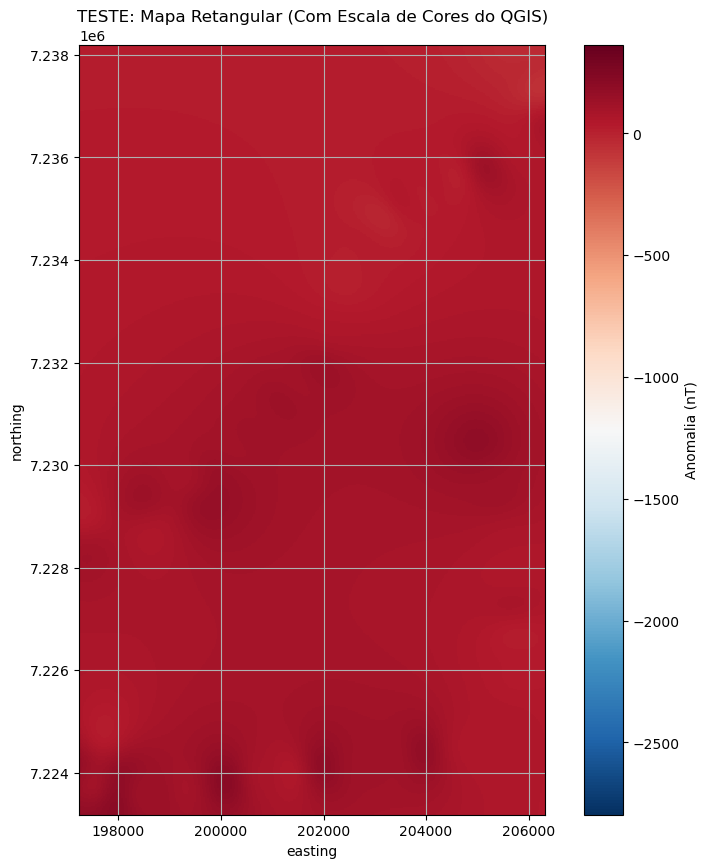

In [26]:
import verde as vd
import numpy as np
import matplotlib.pyplot as plt
import bordado as bd # (Garante que o bordado está importado)

# --- 1. PREPARAÇÃO (Garante que não há NaNs nas coordenadas) ---
print(f"Linhas em 'df_clean' antes de limpar NaNs de coordenadas: {len(df_clean)}")
df_clean_grid = df_clean.dropna(subset=["Mag_Easting", "Mag_Northing"]).copy()
print(f"Linhas em 'df_clean_grid' após limpar NaNs: {len(df_clean_grid)}")

if df_clean_grid.empty:
    raise ValueError("Todos os dados foram removidos ao limpar NaNs das coordenadas.")

# --- 2. DEFINIR A REGIÃO E O GRID ---
try:
    region = bd.get_region((df_clean_grid.Mag_Easting.values, df_clean_grid.Mag_Northing.values))
except NameError as e:
    print(f"Erro: A variável 'df_clean' não foi definida. Rode a célula [12] corrigida primeiro.")
    raise e

print(f"Região final para o grid: {region}")
spacing = 25.0
e_grid, n_grid = vd.grid_coordinates(region, spacing=spacing)
up_grid = np.full(e_grid.size, 0.0, dtype=np.float32)
coords_grid = (e_grid.ravel(), n_grid.ravel(), up_grid)

# --- 3. EXECUTAR A PREDIÇÃO (FAZER O GRID) ---
print("Iniciando a criação do grid 2D (usando o 'eqs' da célula [12])...")
pred_grid = eqs.predict(coords_grid).reshape(e_grid.shape)
print("Grid 2D criado.")

# Empacota em um xarray
grid_retangular = vd.make_xarray_grid(
    data=pred_grid,
    coordinates=(e_grid, n_grid),
    data_names="AMF_ES_Grid",
)

# --- 4. PLOTAR O TESTE (COM OS LIMITES DO QGIS) ---
print("Plotando o resultado (escala de cores travada nos limites do QGIS)...")

plt.figure(figsize=(10, 10))
grid_retangular.AMF_ES_Grid.plot(
    cmap="RdBu_r",
    cbar_kwargs={'label': 'Anomalia (nT)'},
    
    # --- AQUI ESTÁ A MUDANÇA ---
    # Força a barra de cores para os limites que você viu no QGIS
    vmin=-2796.8,  
    vmax=363.4
    # -----------------------------------
)
plt.title("TESTE: Mapa Retangular (Com Escala de Cores do QGIS)")
plt.gca().set_aspect('equal')
plt.grid(True)
plt.show()